# **다중 회귀 분석(Multivariate Regression)**

In [1]:
import warnings
warnings.filterwarnings('ignore')

# **실습용 데이터 설정**

- pandas DataFrame
  - Insurance.csv

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Insurance.csv'
DF = pd.read_csv(url)

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
DF.head(3)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


# **I. 탐색적 데이터 분석**

- 시각화 패키지

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

## **1) 전체 의료비 분포**

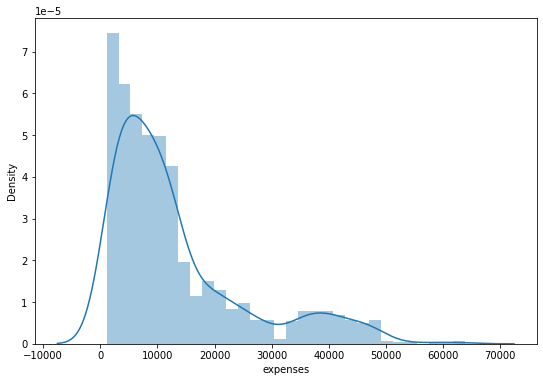

In [5]:
plt.figure(figsize=(9, 6))
sns.distplot(DF.expenses,
             hist=True,
             kde=True)
plt.show()

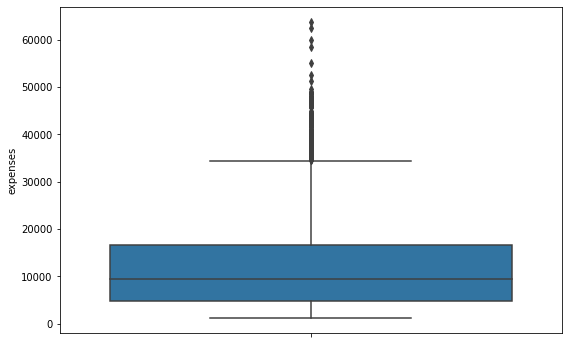

In [6]:
plt.figure(figsize=(9, 6))
sns.boxplot(y='expenses', data=DF)
plt.show()

> ## **2) 성별별 의료비 분포**

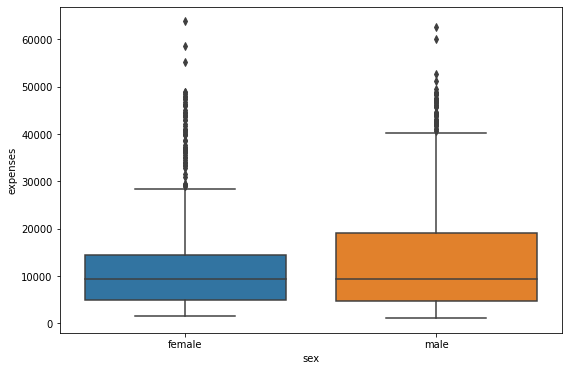

In [7]:
plt.figure(figsize=(9, 6))
sns.boxplot(x='sex', y='expenses', data=DF)
plt.show()

In [8]:
DF.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

> ## **3) 자녀 수별 의료비 분포**

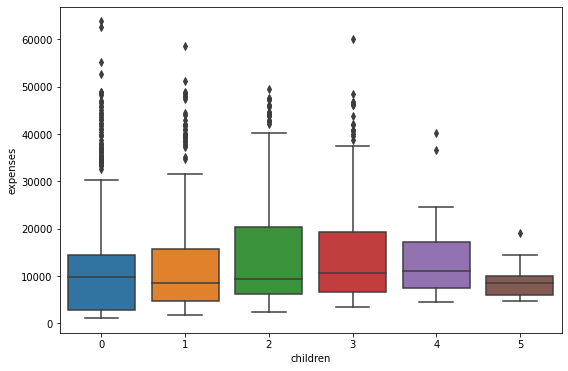

In [9]:
plt.figure(figsize=(9, 6))
sns.boxplot(x='children', y='expenses', data=DF)
plt.show()

In [10]:
DF.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

> ## **4) 흡연 여부별 의료비 분포**

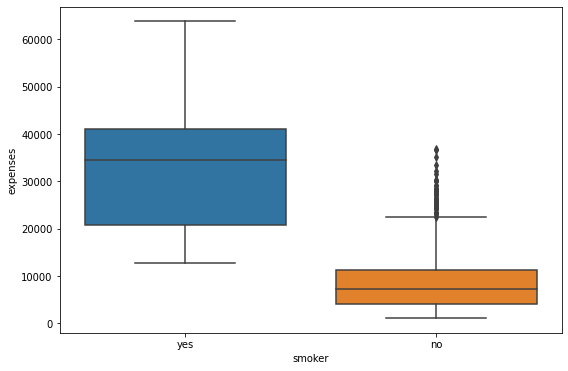

In [11]:
plt.figure(figsize=(9, 6))
sns.boxplot(x='smoker', y='expenses', data=DF)
plt.show()

In [12]:
DF.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

> ## **5) 거주 지역별 의료비 분포**

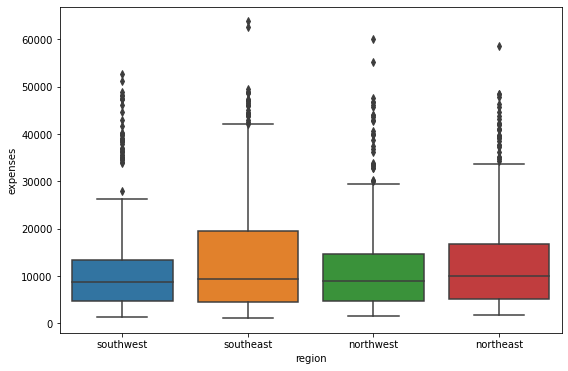

In [13]:
plt.figure(figsize=(9, 6))
sns.boxplot(x='region', y='expenses', data=DF)
plt.show()

In [14]:
DF.region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

> ## **6) BMI 분포 및 의료비와의 관계**

- BMI 분포

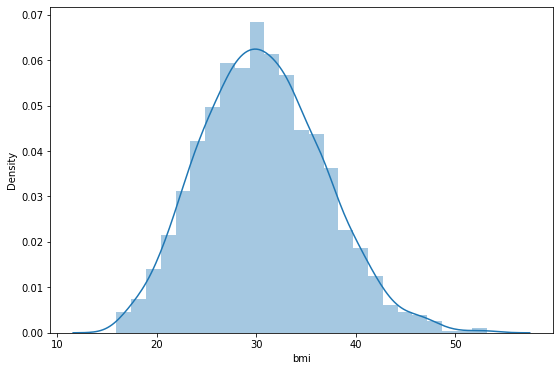

In [15]:
plt. figure(figsize=(9, 6))
sns.distplot(DF.bmi,
            hist=True,
            kde=True)
plt.show()

- BMI와 의료비 간의 관계

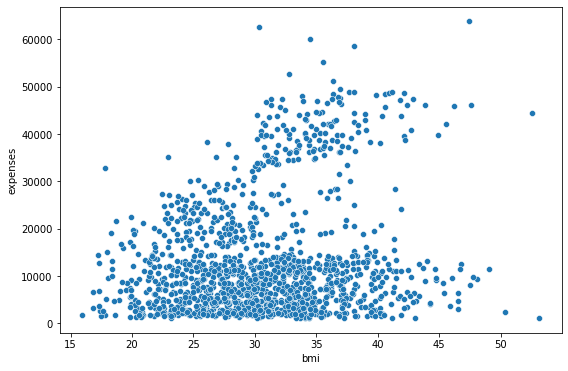

In [16]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x=DF.bmi, y=DF.expenses)
plt.show()

# **II. Modelng - <span style="color:red">sklearn Package</span>**

> ## **1) Integer Encoding**

- object to int64

In [17]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- LabelEncoder()
  - 'sex', 'smoker', 'region' to int64

In [18]:
from sklearn.preprocessing import LabelEncoder

encoder1 = LabelEncoder()
DF['sex'] = encoder1.fit_transform(DF.sex)

In [19]:
encoder2 = LabelEncoder()
DF['smoker'] = encoder1.fit_transform(DF.smoker)

In [20]:
encoder3 = LabelEncoder()
DF['region'] = encoder1.fit_transform(DF.region)

- Encoding 결과 확인

In [21]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


- 변경된 값 확인

In [22]:
DF.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


> ## **2) Train & Test Array Split(7:3)**

In [23]:
from sklearn.model_selection import train_test_split

X = DF[['age', 'sex']]
y = DF['expenses']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2045)

print('Train Data :', X_train.shape, y_train.shape)
print('Test Data :', X_test.shape, y_test.shape)

Train Data : (936, 2) (936,)
Test Data : (402, 2) (402,)


> ## **3) .fit()**

In [24]:
from sklearn.linear_model import LinearRegression
RA = LinearRegression()
RA.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

> ## **4) .predict()**

In [25]:
y_hat = RA.predict(X_test)

> # **5) 오차(Error)값 확인**

- Mean Squared Error - sklearn

In [26]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse1 = mean_squared_error(y_test, y_hat)

np.sqrt(mse1)

10633.607635499553

# **III. Modeling - <span style="color:blue">statsmodels Package</span>**

In [27]:
import pandas as pd

url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Insurance.csv'
DF = pd.read_csv(url)

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


> ## **1) Data Preprocessing**

- Train & Test DataFrame Split(7:3)

In [28]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(DF, test_size=0.3, random_state = 2045)

train_set.shape, test_set.shape

((936, 7), (402, 7))

In [29]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 8 to 887
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       936 non-null    int64  
 1   sex       936 non-null    object 
 2   bmi       936 non-null    float64
 3   children  936 non-null    int64  
 4   smoker    936 non-null    object 
 5   region    936 non-null    object 
 6   expenses  936 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 58.5+ KB


> ## **2) expenses ~ age + sex**

- train_set으로 모델 생성
- OLS(최소제곱법) : Ordinary Least Squares

In [30]:
import statsmodels.formula.api as smf

Model_1 = smf.ols(formula='expenses ~ age + sex',
                  data=train_set).fit()

> ## **3) y_hat 생성**

- test_set으로 y_hat(예측값) 생성

In [31]:
y_hat_1 = Model_1.predict(test_set[['age', 'sex']])

> ## **4) 오차(Error)값 확인**

- Mean Squared Error - sklearn

In [32]:
mse2 = mean_squared_error(test_set.expenses, y_hat_1)

np.sqrt(mse2)

10633.607635499557

# **IV. Package별 오차값 비교**

In [33]:
print('sklearn     :', np.sqrt(mse1))
print('statsmodels :', np.sqrt(mse2))

sklearn     : 10633.607635499553
statsmodels : 10633.607635499557
